In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("california_housing_train.csv")
data_df = df.copy()

In [3]:
print("(No of rows, No of Columns) = ",data_df.shape)
data_df.head()

(No of rows, No of Columns) =  (17000, 9)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [5]:
arr = np.array(df.drop('median_house_value', axis=1)).T

for i in range(len(arr)):
  arr[i] = (arr[i]-np.mean(arr[i]))/np.std(arr[i], axis=0)

y_train = np.array(df['median_house_value'])  
x_train = arr.T

print(x_train.shape,y_train.shape) 

(17000, 8) (17000,)


In [6]:
def loss(y_pred,y_true):
  
  mse=0
  n=y_pred.shape[0]
  for i in range(n):
      mse= mse + (y_pred[i] - y_true[i])**2
   
  
  mse = mse/n 
  return mse

In [7]:
def y_prediction(x,a,b):
  

  m,n = x.shape
  r = a.shape
  y = 0
  if n==r:
      y=np.dot(x,a)

  s=np.full((m,),b)
  y_pred= y+s
      

  assert(y_pred.shape == (m,))
  return y_pred


In [8]:
def gradient(x,a,b,y_true):
  
  m,n = x.shape
  yp =  y_prediction(x,a,b)   # compute y_predicton
  

  #  gradient for weights a as da
  da = (2/m) * np.dot(x.T, (yp - y_true))


  #  gradients for bias b as db
  db = (2/m) * np.sum(yp - y_true)
    
  assert(da.shape ==(n,))
  return (da,db)

In [9]:
def gradient_descent(x,y_true,learning_rate=0.01,epochs = 10):
  
  m,n = x.shape
  loss_mse = []                                 # initialize empty list to store loss
  a = np.random.normal(0, 0.5, size = (n,)) * np.sqrt(2/n)     # initialize a- weights and b- bias
  b = 0
  y_pred= y_prediction(x,a,b)
  for i in range(epochs):
      
      
    #  derivative using gradient() function
     grad=gradient(x,a,b,y_true) 
    #  gradient descent now to update a and b
     a= a - learning_rate*grad[0]
     b= b - learning_rate*grad[1]
    #  loss at this point using loss() function
     y_pred= y_prediction(x,a,b)
     l_mse= loss(y_pred, y_true)
    # Storing loss in the list loss_mse
     loss_mse.append(l_mse)
     print("Epoch ",i+1," Completed!","loss = ",l_mse) #print l_mse


  print("Training completed!!")
  
  


  assert(a.shape==(n,))
  return (loss_mse,a,b)
  


Epoch  1  Completed! loss =  54723353292.7414
Epoch  2  Completed! loss =  53088985617.17377
Epoch  3  Completed! loss =  51519338901.55824
Epoch  4  Completed! loss =  50011850195.88136
Epoch  5  Completed! loss =  48564058042.95157
Epoch  6  Completed! loss =  47173598459.27627
Epoch  7  Completed! loss =  45838201075.11364
Epoch  8  Completed! loss =  44555685427.36358
Epoch  9  Completed! loss =  43323957399.265
Epoch  10  Completed! loss =  42141005801.08026
Epoch  11  Completed! loss =  41004899086.18243
Epoch  12  Completed! loss =  39913782197.19513
Epoch  13  Completed! loss =  38865873537.01191
Epoch  14  Completed! loss =  37859462059.77218
Epoch  15  Completed! loss =  36892904477.02994
Epoch  16  Completed! loss =  35964622574.565445
Epoch  17  Completed! loss =  35073100635.437645
Epoch  18  Completed! loss =  34216882965.10011
Epoch  19  Completed! loss =  33394571514.507374
Epoch  20  Completed! loss =  32604823597.356983
Epoch  21  Completed! loss =  31846349697.726925

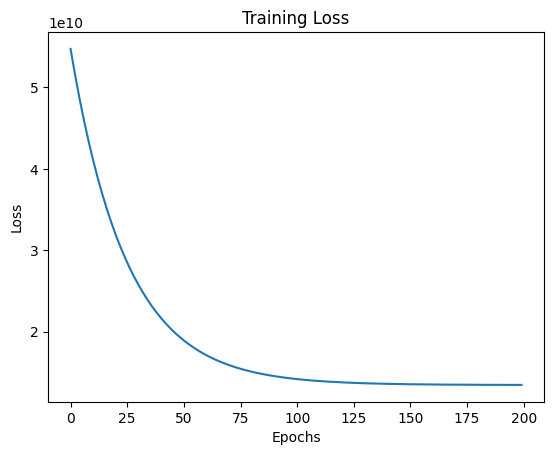

In [10]:
apply_grad_descent= gradient_descent(x_train, y_train,epochs=200)
train_loss = apply_grad_descent[0]
epochs=200
plt.plot([i for i in range(epochs)], train_loss)
plt.title("Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()



In [12]:
test_df = pd.read_csv("california_housing_test.csv")

arr1 = np.array(test_df.drop('median_house_value', axis=1)).T

for i in range(len(arr)):
  arr1[i] = (arr1[i]-np.mean(arr[i]))/np.std(arr[i], axis=0)

y_test = np.array(test_df['median_house_value'])                                                                                                            # extract the price column from data

x_test = arr.T
s= gradient_descent(x_test,y_test)
a=s[1]
b=s[2]
y_pred = y_prediction(x_test, a,b)
test_loss = loss(y_pred, y_test)

print("Loss on test data = ",test_loss)



Epoch  1  Completed! loss =  53486528788.35903
Epoch  2  Completed! loss =  51875017462.55129
Epoch  3  Completed! loss =  50327321985.245544
Epoch  4  Completed! loss =  48840915248.841125
Epoch  5  Completed! loss =  47413370219.19799
Epoch  6  Completed! loss =  46042355972.728775
Epoch  7  Completed! loss =  44725633890.420105
Epoch  8  Completed! loss =  43461054002.57046
Epoch  9  Completed! loss =  42246551478.28005
Epoch  10  Completed! loss =  41080143253.951324
Training completed!!
Loss on test data =  41080143253.951324
